In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

DEFINIÇÃO DA CONDIÇÃO DE PARADA

In [79]:
# Recebe um vetor de listas de ponto flutuante A, conforme segue: A = [[1.,2.,3.,...],[4.,5.,6.,...],...], e um inteiro
# i que indica a posição da lista que será trabalhada em relação ao vetor. Para o cálculo do erro relativo, denotado por
# Dr_k, são utilizadas a lista atual e a anterior; quando a lista utilizada se encontra na posição 0, retorna o valor 1

def condicaoDeParada(A, i):
    if i == 0: return 1
    else:
        x = []
        for j in range(len(A[i])): x.append(abs(A[i][j] - A[i-1][j]))
        D_k = max(x)
        Dr_k = D_k/max(A[i])
        return Dr_k

MÉTODO DE JACOBI PARA A SOLUÇÃO DE SISTEMAS LINEARES

In [34]:
# Definição das matrizes utilizadas para o teste do método

# Sistema de exemplo:

# 10*x1 + 2*x2 +  1*x3 =  7
#  1*x1 + 5*x2 +  1*x3 = -8
#  2*x1 + 3*x2 + 10*x3 =  6

# Solução (para precisão 0.05): [0.9994, -1.9998, 0.9984]

A = np.array([[10,2,1],[1,5,1],[2,3,10]])
b = np.array([[7],[-8],[6]])

In [35]:
# Define um critério de convergência para os sistemas aplicados ao método de Jacobi. É importante ressaltar que a não
# convergência por esse critério não garante que o sistema não possa ser resolvido pelo método de Jacobi. Recebe uma
# matriz de coeficientes A

def criterioDasLinhas(A):
    x = []
    
    for i in range(A.shape[0]):
        soma = 0
        for j in range(A.shape[0]):
            if i != j:
                soma = soma + A[i][j]
        x.append(soma/A[i][i])

    if(max(x) < 1):
        return 1 # converge
    else:
        return 0 # não converge

In [42]:
# Teste para o critério de convergência. Imprime o resultado da verificação na tela

if criterioDasLinhas(A) == 1:
    print("O sistema converge para uma solução exata!")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!")

O sistema converge para uma solução exata!


In [39]:
# Recebe uma matriz de coeficientes A, uma matriz de resultados b, e o erro relativo requerido para a aproximação. Toma
# como aproximação inicial o vetor x = [0,0,0,...] e armazena todas as aproximações obtidas em um vetor de listas de
# ponto flutuante X, como segue: X = [[0.1,0.2,0.3,...],[0.4,0.5,0.6,...],...]. Para apenas quando a condicaoDeParada
# retorna o erro relativo requerido ou um erro menor. Deve se assegurar que a matriz de coeficientes gere uma lista
# convergente para que seja executado corretamente

def metodoDeJacobi(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X

In [22]:
# Teste do método de Jacobi para a solução de sistemas lineares. Imprime os resultados obtidos em todas as iterações

X = metodoDeJacobi(A,b,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [0.70000000000000007, -1.6000000000000001, 0.60000000000000009].
Iteração 2: [0.95999999999999996, -1.8600000000000003, 0.94000000000000006].
Iteração 3: [0.9780000000000002, -1.9800000000000002, 0.96600000000000008].
Iteração 4: [0.99940000000000007, -1.9888000000000003, 0.99840000000000007].


MÉTODO DE GAUSS-SEIDEL PARA SOLUÇÃO DE SISTEMAS LINERARES

In [32]:
# Definição das matrizes utilizadas para o teste do método

# Sistema de exemplo:

# 5*x1 + 1*x2 + 1*x3 = 5
# 3*x1 + 4*x2 + 1*x3 = 6
# 3*x1 + 3*x2 + 6*x3 = 0

# Solução (para precisão 0.05): [1.0075, 0.9912, -0.9993]

C = np.array([[5,1,1],[3,4,1],[3,3,6]])
d = np.array([[5],[6],[0]])

In [40]:
# Recebe uma matriz de coeficientes A, uma matriz de resultados b, e o erro relativo requerido para a aproximação. Toma
# como aproximação inicial o vetor x = [0,0,0,...] e armazena todas as aproximações obtidas em um vetor de listas de
# ponto flutuante X, como segue: X = [[0.1,0.2,0.3,...],[0.4,0.5,0.6,...],...]. Para apenas quando a condicaoDeParada
# retorna o erro relativo requerido ou um erro menor. Deve se assegurar que a matriz de coeficientes gere uma lista
# convergente para que seja executado corretamente

def metodoDeGaussSeidel(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    if j < len(y):
                        sigma = sigma + A[i][j]*y[j]
                    else:
                        sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X

In [43]:
# Teste do método de Gauss-Seidel para a solução de sistemas lineares. Imprime os resultados obtidos em todas as
# iterações

X = metodoDeGaussSeidel(C,d,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [1.0, 0.75, -0.875].
Iteração 2: [1.0250000000000001, 0.94999999999999996, -0.98749999999999993].
Iteração 3: [1.0075000000000001, 0.99124999999999996, -0.9993749999999999].


INTERPRETAÇÃO GEOMÉTRICA PARA O MÉTODO DE JACOBI

In [44]:
# Definição das matrizes de exemplo:

# Sistema de exemplo:

# 1*x1 + 1*x2 =  3
# 1*x1 - 3*x2 = -3

# Solução (para precisão 0.3): [1.3333, 1.3333]

E = np.array([[1,1],[1,-3]])
f = np.array([[3],[-3]])

In [46]:
# Cálculo das iterações. Cada iteração será representada por um ponto no gráfico

X = metodoDeJacobi(E,f,0.30)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0].
Iteração 1: [3.0, 1.0].
Iteração 2: [2.0, 2.0].
Iteração 3: [1.0, 1.6666666666666665].
Iteração 4: [1.3333333333333335, 1.3333333333333333].


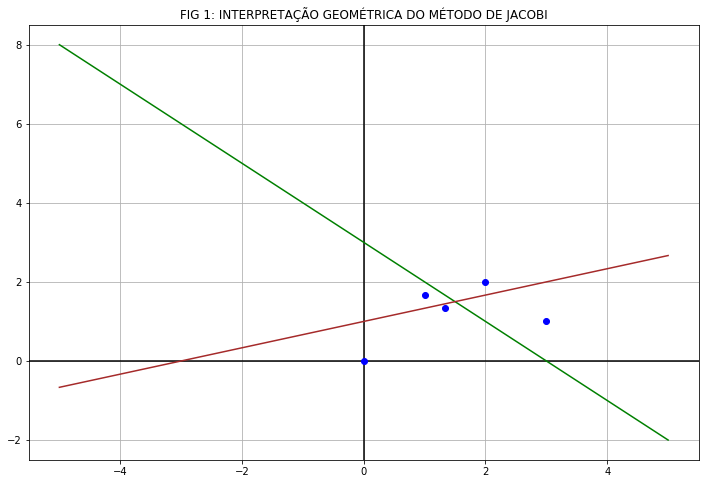

In [64]:
# Gráfico do sistema em comparação com as iterações. O ponto em que as retas se encontram é a solução exata do sistema

x = np.linspace(-5,5)
x1 = 3 - x
x2 = (1/3)*(3 + x)

plt.title("FIG 1: INTERPRETAÇÃO GEOMÉTRICA DO MÉTODO DE JACOBI")
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

plt.grid(True)
plt.plot([X[0][0],X[1][0],X[2][0],X[3][0],X[4][0]], [X[0][1],X[1][1],X[2][1],X[3][1],X[4][1]], 'ro', color = 'blue')
plt.plot(x, x1, color = 'green')
plt.plot(x, x2, color = 'brown')
plt.show()

INTERPRETAÇÃO GEOMÉTRICA PARA O MÉTODO DE GAUSS-SEIDEL

In [76]:
# Definição das matrizes de exemplo:

# Sistema de exemplo:

# 1*x1 + 1*x2 =  3
# 1*x1 - 3*x2 = -3

# Solução (para precisão 0.3): [1.4444, 1.4814]

G = np.array([[1,1],[1,-3]])
h = np.array([[3],[-3]])

In [77]:
# Cálculo das iterações. Cada iteração será representada por um ponto no gráfico

X = metodoDeGaussSeidel(G,h,0.3)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0].
Iteração 1: [3.0, 2.0].
Iteração 2: [1.0, 1.3333333333333333].
Iteração 3: [1.6666666666666667, 1.5555555555555556].
Iteração 4: [1.4444444444444444, 1.4814814814814814].


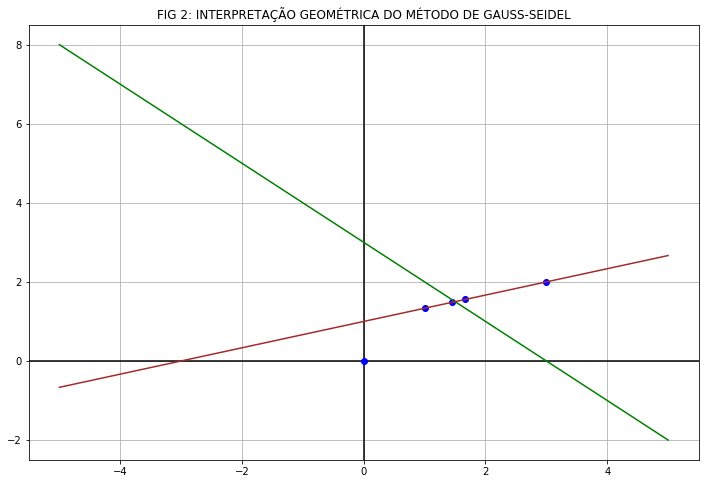

In [81]:
# Gráfico do sistema em comparação com as iterações. O ponto em que as retas se encontram é a solução exata do sistema

x = np.linspace(-5,5)
x1 = 3 - x
x2 = (1/3)*(3 + x)

plt.title("FIG 2: INTERPRETAÇÃO GEOMÉTRICA DO MÉTODO DE GAUSS-SEIDEL")
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

plt.grid(True)
plt.plot([X[0][0],X[1][0],X[2][0],X[3][0],X[4][0]], [X[0][1],X[1][1],X[2][1],X[3][1],X[4][1]], 'ro', color = 'blue')
plt.plot(x, x1, color = 'green')
plt.plot(x, x2, color = 'brown')
plt.show()

TESTE DA CONDIÇÃO DE PARADA APLICADA AO EXEMPLO 1 (VIDE APOSTILA METODOS ITERATIVOS)

In [104]:
# Aplicada ao método de Jacobi

I = np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
j = np.array([[6],[25],[-11],[15]])

X = metodoDeJacobi(I,j,2e-16)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0, 0].
Iteração 1: [0.60000000000000009, 2.2727272727272729, -1.1000000000000001, 1.875].
Iteração 2: [1.0472727272727274, 1.7159090909090911, -0.80522727272727279, 0.88522727272727275].
Iteração 3: [0.93263636363636371, 2.0533057851239671, -1.0493409090909092, 1.1308806818181818].
Iteração 4: [1.0151987603305785, 1.9536957644628101, -0.96810862603305792, 0.97384271694214875].
Iteração 5: [0.98899130165289262, 2.0114147257700976, -1.01028590392562, 1.0213505100723139].
Iteração 6: [1.0031986533621338, 1.9922412606827575, -0.99452173674633737, 0.99443373984551087].
Iteração 7: [0.99812847341754329, 2.0023068815526601, -1.0019722306195999, 1.0035943101506737].
Iteração 8: [1.0006251342791861, 1.9986703011223566, -0.99903557551317523, 0.99888839059030243].
Iteração 9: [0.99967414521487086, 2.0004476715450092, -1.0003691576845712, 1.0006191901399695].
Iteração 10: [1.0001185986914152, 1.9997679470100356, -0.9998281428744763, 0.99978597846005013].
Iteração 11: [0.99994242

In [107]:
# Aplicada ao método de Gauss-Seidel

K = np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
l = np.array([[6],[25],[-11],[15]])

X = metodoDeGaussSeidel(K,l,2e-16)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0, 0].
Iteração 1: [0.60000000000000009, 2.3272727272727276, -0.9872727272727273, 0.87886363636363629].
Iteração 2: [1.0301818181818183, 2.0369380165289259, -1.0144561983471074, 0.98434121900826432].
Iteração 3: [1.0065850413223141, 2.003555016904583, -1.0025273846731781, 0.99835094557663406].
Iteração 4: [1.0008609786250939, 2.000298250656547, -1.0003072761017007, 0.99984974649108227].
Iteração 5: [1.0000912802859949, 2.000021342246459, -1.0000311471834449, 0.99998810325964727].
Iteração 6: [1.0000083636613348, 2.0000011733362681, -1.0000027450726756, 0.99999921686481497].
Iteração 7: [1.000000666348162, 2.0000000246073677, -1.0000002091224143, 0.9999999646319353].
Iteração 8: [1.0000000442852197, 1.9999999946606364, -1.0000000129277868, 1.0000000003862879].
Iteração 9: [1.0000000020516211, 1.9999999989059063, -1.0000000004811047, 1.000000000350147].
Iteração 10: [0.99999999998681166, 1.9999999998595697, -0.99999999997639066, 1.0000000000556126].
Iteração 11: [0.999

In [109]:
# Conclui-se que o método de Gauss-Seidel é muito mais eficiente que o método de Jacobi

APOSTILA MÉTODO ITERATIVO DE JACOBI: RESOLUÇÃO DE EXEMPLOS

In [110]:
# 1: Aplicação do método iterativo de Jacobi para o sistema

# 10*x1 + 2*x2 +  1*x3 =  7
#  1*x1 + 5*x2 +  1*x3 = -8
#  2*x1 + 3*x2 + 10*x3 =  6

# Já resolvido. Transcrição completa abaixo:

A = np.array([[10,2,1],[1,5,1],[2,3,10]])
b = np.array([[7],[-8],[6]])

def condicaoDeParada(A, i):
    if i == 0: return 1
    else:
        x = []
        for j in range(len(A[i])): x.append(abs(A[i][j] - A[i-1][j]))
        D_k = max(x)
        Dr_k = D_k/max(A[i])
        return Dr_k

def metodoDeJacobi(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X

X = metodoDeJacobi(A,b,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [0.70000000000000007, -1.6000000000000001, 0.60000000000000009].
Iteração 2: [0.95999999999999996, -1.8600000000000003, 0.94000000000000006].
Iteração 3: [0.9780000000000002, -1.9800000000000002, 0.96600000000000008].
Iteração 4: [0.99940000000000007, -1.9888000000000003, 0.99840000000000007].


In [111]:
# 2: Definição do critério das linhas. Já resolvido. Transcrição abaixo:

def criterioDasLinhas2(A):
    x = []
    
    for i in range(A.shape[0]):
        soma = 0
        for j in range(A.shape[0]):
            if i != j:
                soma = soma + A[i][j]
        x.append(soma/A[i][i])

    if(max(x) < 1):
        return 1 # converge
    else:
        return 0 # não converge

In [113]:
# Exemplo A: Teste do critério das linhas para a matriz

# 10  2  1
#  1  5  1
#  2  3 10

# Já resolvido. Transcrição abaixo:

A = np.array([[10,2,1],[1,5,1],[2,3,10]])

if criterioDasLinhas2(A) == 1:
    print("O sistema converge para uma solução exata!")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!")

O sistema converge para uma solução exata!


In [139]:
# Exemplo B:  Aplicação do método de Jacobi para o sistema

# 1*x1 + 1*x2 =  3
# 1*x1 - 3*x2 = -3

# Solução esperada: [1.5, 1.5]
# No entanto, a matriz de coeficientes diverge

A = np.array([[1,1],[1,-3]])
b = np.array([[3],[-3]])

if criterioDasLinhas2(A) == 1:
    print("O sistema converge para uma solução exata!\n")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!\n")

X = metodoDeJacobi(A,b,4e-16)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Não é possível definir se o sistema converge para uma solução exata com este método!

Iteração 0: [0, 0].
Iteração 1: [3.0, 1.0].
Iteração 2: [2.0, 2.0].
Iteração 3: [1.0, 1.6666666666666665].
Iteração 4: [1.3333333333333335, 1.3333333333333333].
Iteração 5: [1.6666666666666667, 1.4444444444444446].
Iteração 6: [1.5555555555555554, 1.5555555555555556].
Iteração 7: [1.4444444444444444, 1.5185185185185184].
Iteração 8: [1.4814814814814816, 1.4814814814814814].
Iteração 9: [1.5185185185185186, 1.4938271604938271].
Iteração 10: [1.5061728395061729, 1.5061728395061729].
Iteração 11: [1.4938271604938271, 1.502057613168724].
Iteração 12: [1.497942386831276, 1.4979423868312758].
Iteração 13: [1.5020576131687242, 1.4993141289437588].
Iteração 14: [1.5006858710562412, 1.5006858710562414].
Iteração 15: [1.4993141289437586, 1.5002286236854137].
Iteração 16: [1.4997713763145863, 1.4997713763145861].
Iteração 17: [1.5002286236854139, 1.499923792104862].
Iteração 18: [1.500076207895138, 1.50007620789

In [188]:
# Exemplo C: Aplicação do método de Jacobi para o sistema:

# 1*x1 + 3*x2 + 1*x3 = -2
# 5*x1 + 2*x2 + 2*x3 =  3
# 0*x1 + 6*x2 + 8*x3 = -6

# Sistema diverge no formato acima, conforme veremos abaixo:

A = np.array([[1,3,1],[5,2,2],[0,6,8]])
b = np.array([[-2],[3],[-6]])

X = metodoDeJacobi(A,b,0.75)

if criterioDasLinhas2(A) == 1:
    print("O sistema converge para uma solução exata!\n")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!\n")

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))
    
# Alternando a primeira com a segunda linha, o sistema converge e satisfaz o critério das linhas:

# 5*x1 + 2*x2 + 2*x3 =  3
# 1*x1 + 3*x2 + 1*x3 = -2
# 0*x1 + 6*x2 + 8*x3 = -6

A = np.array([[5,2,2],[1,3,1],[0,6,8]])
b = np.array([[3],[-2],[-6]])

X = metodoDeJacobi(A,b,2e-16)

if criterioDasLinhas2(A) == 1:
    print("\nO sistema converge para uma solução exata!\n")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!\n")

# Devido ao grande número de iterações necessárias para se obter a solução exata, iremos printar apenas a última
print("Iteração {0}: {1}.".format(len(X)-1, X[len(X)-1]))

Não é possível definir se o sistema converge para uma solução exata com este método!

Iteração 0: [0, 0, 0].
Iteração 1: [-2.0, 1.5, -0.75].
Iteração 2: [-5.75, 7.25, -1.875].
Iteração 3: [-21.875, 17.75, -6.1875].
Iteração 4: [-49.0625, 62.375, -14.0625].

O sistema converge para uma solução exata!

Iteração 111: [1.0, -1.0, 0.0].
